##**Product Sales Analysis**




##**Phase 3: Development Part 1**

##Step 1: Import Necessary Libraries

In [1]:
##You will need Python libraries for data manipulation and analysis. You can use Pandas for data processing.
import pandas as pd


##**Step 2: Load the Dataset**

You can use Pandas to load the dataset from the provided link.

In [2]:
# Provide the dataset URL
dataset_url = "/content/sample_data/statsfinal.csv"

# Load the dataset into a Pandas DataFrame
sales_data = pd.read_csv(dataset_url)


##Step 3: Explore the Dataset

Before cleaning the data, it's essential to understand its structure and identify any potential issues. Use the following code to get some basic insights:

In [3]:
# Display the first few rows of the dataset
print(sales_data.head())

# Check the data types and null values
print(sales_data.info())

# Summary statistics
print(sales_data.describe())


   Unnamed: 0        Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2  \
0           0  13-06-2010  5422  3725   576   907  17187.74  23616.50   
1           1  14-06-2010  7047   779  3578  1574  22338.99   4938.86   
2           2  15-06-2010  1572  2082   595  1145   4983.24  13199.88   
3           3  16-06-2010  5657  2399  3140  1672  17932.69  15209.66   
4           4  17-06-2010  3668  3207  2184   708  11627.56  20332.38   

       S-P3      S-P4  
0   3121.92   6466.91  
1  19392.76  11222.62  
2   3224.90   8163.85  
3  17018.80  11921.36  
4  11837.28   5048.04  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4600 non-null   int64  
 1   Date        4600 non-null   object 
 2   Q-P1        4600 non-null   int64  
 3   Q-P2        4600 non-null   int64  
 4   Q-P3        4600 non-null   int64  
 5   Q-P4        4600 n

##Step 4: Data Cleaning

Data cleaning involves handling missing values, dealing with duplicates, and addressing any other data quality issues.

In [4]:
# Handle missing values (e.g., replace NaN with zeros for sales data)
sales_data.fillna(0, inplace=True)

# Check for duplicates and remove them
sales_data.drop_duplicates(inplace=True)

##Step 5: Export Cleaned Data

It's a good practice to save the cleaned data to a new file for future use.



In [5]:
# Save the cleaned data to a CSV file
sales_data.to_csv('cleaned_sales_data.csv', index=False)

##**Step 6: IBM Visualization**

[IBM Visualization:](https://us1.ca.analytics.ibm.com/bi/?perspective=dashboard&pathRef=.my_folders%2FDAC_Phase3%2FDAC_Phase3&action=view&mode=dashboard&subView=model0000018b41a5acc0_00000002)

---

##**Phase 4:Development Part 2**





##**Step 1: Data Analysis in Python**



**Data Exploration:**

Load your preprocessed and cleaned dataset into IBM Cognos.
Use the "Data Modules" feature to create a logical view of the data that combines multiple sources and transforms the data as needed.
Explore the data to understand its characteristics, distribution, and potential patterns.

**Descriptive Analytics:**

Create various descriptive statistics to summarize your data, such as mean, median, mode, standard deviation, etc.
Generate charts and graphs to visualize the distribution of key variables like sales, customer demographics, or product performance.

**Sales Trend Analysis:**

Use time series charts to analyze sales trends over time. This can help identify seasonality, peaks, and troughs in your sales data.


**Import the necessary Libraries for the Model**

In [6]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 **Load the cleaned dataset for the model**

In [7]:
# Load the cleaned dataset

sales_data = pd.read_csv('/content/cleaned_sales_data.csv')

**Perform exploratory data analysis (EDA)**

Exploratory Data Analysis (EDA) is an essential step in understanding your data, identifying patterns, and uncovering insights. To perform EDA on your product sales dataset, you can use Python and libraries like Pandas, Matplotlib, and Seaborn. Here's a step-by-step guide with code snippets for EDA:

In [8]:
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d-%m-%Y')
    except ValueError:
        return pd.NaT  # Not a Timestamp for invalid dates

# Apply the custom date parsing function to the 'Date' column
sales_data['Date'] = sales_data['Date'].apply(parse_date)

# Remove rows with invalid dates (NaT values)
sales_data = sales_data.dropna(subset=['Date'])

# Set the 'Date' column as the index
sales_data.set_index('Date', inplace=True)

# Sum sales values across the relevant columns for each row
sales_data['Total_Sales'] = sales_data[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2', 'S-P3', 'S-P4']].sum(axis=1)

# Calculate monthly sales totals
monthly_sales = sales_data['Total_Sales'].resample('M').sum()

<ipython-input-8-a3171c3d2ec9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Total_Sales'] = sales_data[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2', 'S-P3', 'S-P4']].sum(axis=1)


**Visualize monthly sales trends**

To visualize monthly sales trends from your dataset, you can use Python with libraries like Pandas, Matplotlib, and Seaborn. Here's how you can create a line plot to visualize the monthly sales trends:

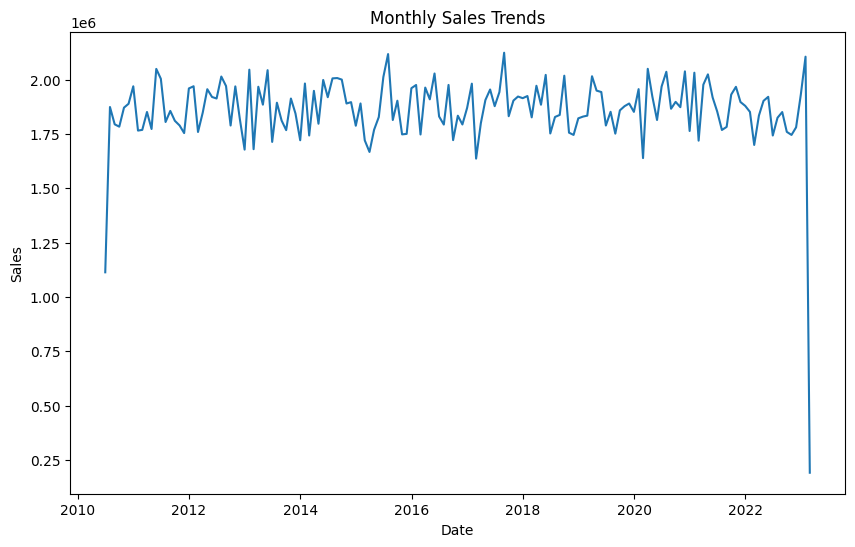

In [9]:
# Visualize monthly sales trends

plt.figure(figsize=(10, 6))
plt.title('Monthly Sales Trends')
sns.lineplot(data=monthly_sales)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##**Step 2: Model Building and Evaluation**

**Machine Learning Model Building:**

Implement machine learning models, such as regression, clustering, or classification, to predict sales trends or customer behaviors.
Use the "Modeler" in IBM Cognos to build and train these models.

**Evaluation of Models:**

Create interactive dashboards and reports in IBM Cognos to present your analyses and insights.
Include various visualizations like charts, tables, and maps to convey your findings effectively.

**Import machine learning libraries**

In [14]:
# Import machine learning libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Prepare data for modeling**

To prepare your data for modeling, you need to set up your features (independent variables) and the target variable (the variable you want to predict). Additionally, you may need to split your data into training and testing sets. Here's how you can prepare your data for modeling using Python:

In [30]:
# Replace 'Sales' with the correct column name for your target variable
y = sales_data[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2', 'S-P3', 'S-P4']]  # Replace 'Actual_Target_Column_Name' with the correct column name
X = sales_data[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2', 'S-P3', 'S-P4']]

**Split data into training and testing sets**

In [22]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Build a linear regression model**

To build a linear regression model for your data using Python, you can use the scikit-learn library, which is a powerful machine learning library. Here's a step-by-step guide to building a linear regression model:

In [23]:
# Build a linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions

y_pred = model.predict(X_test)

In [28]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
# Print evaluation metrics

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.7930562575236964e-23
R-squared: 1.0


In [34]:
sales_data.to_csv('processed_sales_data.csv', index=False)

##**Step 3: Document Your Analysis**



*  EDA findings, such as sales trends and patterns.
*   Description of the machine learning model you built.

*  Model evaluation metrics.
*   Insights and recommendations based on the analysis.







##**Step 4: Visualization with IBM Cognos**



Here is the link [IBM Visualization:](https://us1.ca.analytics.ibm.com/bi/?perspective=dashboard&pathRef=.my_folders%2FDAC_Phase4%2FDAC_Phase4&action=view&mode=dashboard&subView=model0000018b65efe8d7_00000002)

--------
